<h1>Содержание проекта по статистическому анализу данных<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Выдвижение-и-проверка-гипотез" data-toc-modified-id="Выдвижение-и-проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выдвижение и проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>


# Исследование 

Исследование состоит в поиске наиболее прибыльного тарифа для телефонной компании "Мегалайн" в целях корректировки рекламного бюджета. 
- Цель исследования: корректировка рекламного бюджета в соответствии с прибыльностью тарифов
- Задача: проанализировать поведение клиентов и сделать вывод — какой тариф предпочтительнее (как объект рекламы).
- Методы:  исследовательский анализ,статистический анализ
- Данные: тарифные планы для анализа: **«Смарт» и «Ультра»**, данные 500 пользователей «Мегалайна» с признаками: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

датасеты:
- /datasets/calls.csv -  информация о звонках
- /datasets/internet.csv - информация об интернет-сессиях
- /datasets/messages.csv -  информация о сообщениях
- /datasets/tariffs.csv -  информация о тарифах
- /datasets/users.csv - информация о пользователях

Для исследования и достижения целей - изучим (в случае необходимости - скорректируем) типы данных, приведём таблицы к единому фрейму.

## Изучение данных из файла

Импоритруем библиотеки для анализа данных:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime 
from scipy import stats as st
import math
import warnings
from scipy.stats import levene


warnings.filterwarnings('ignore')


Введём переменные в соответствии с исходными файлами/фреймами:

In [2]:
calls = pd.read_csv('https://www.dropbox.com/s/ki9d924ek7s8hjc/calls.csv?dl=1', decimal = '.') 
internet = pd.read_csv('https://www.dropbox.com/s/xbb857btuz6t4wf/internet.csv?dl=1', decimal = '.', index_col=0) #извлекаем данные без столбца 'Unnamed 0'
messages = pd.read_csv('https://www.dropbox.com/s/xpdlviua9s3h2fh/messages.csv?dl=1', decimal = '.') 
tariffs = pd.read_csv('https://www.dropbox.com/s/opdpb0io8zkzhvh/tariffs.csv?dl=1', decimal = '.') 
users = pd.read_csv('https://www.dropbox.com/s/eazyawfmp4z4845/users.csv?dl=1', decimal = '.') 

#ознакомимся с данными из фреймов с помощью info()

calls.info()
print ('____________________________________________')
internet.info()
print ('____________________________________________')
messages.info()
print ('____________________________________________')
tariffs.info()
print ('____________________________________________')
users.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
____________________________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB
____________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036

Рассмотрим формат данных более подробно с помощью метода head().

In [3]:
display (calls.head(10))
display (internet.head(10))
display (messages.head(10))
display (tariffs.head(10))
display (users.head(10))

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


***Промежуточный вывод:*** Первичная оценка данных показала наличие пропущенных значений в столбце 'churn_date' фрейма **Users**

Рассмотрим распределения и экстремумы данных более подробно данные столбцов с помощью метода describe()

In [4]:
print (calls.describe())
print (internet.describe())
print (messages.describe())
print (tariffs.describe())
print (users.describe())

            duration        user_id
count  202607.000000  202607.000000
mean        6.755887    1253.940619
std         5.843365     144.722751
min         0.000000    1000.000000
25%         1.300000    1126.000000
50%         6.000000    1260.000000
75%        10.700000    1379.000000
max        38.000000    1499.000000
             mb_used        user_id
count  149396.000000  149396.000000
mean      370.192426    1252.099842
std       278.300951     144.050823
min         0.000000    1000.000000
25%       138.187500    1130.000000
50%       348.015000    1251.000000
75%       559.552500    1380.000000
max      1724.830000    1499.000000
             user_id
count  123036.000000
mean     1256.989410
std       143.523967
min      1000.000000
25%      1134.000000
50%      1271.000000
75%      1381.000000
max      1499.000000
       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000 

Проверим фрейм users (как наиболее полный в части id клиентов) на предмет дубликатов

In [5]:
users.drop_duplicates() #дубликатов не обнаружено

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


***Промежуточные выводы*** по методу describe() 
- выявлен столбец 'Unnamed: 0' повторяющий последовательность(совпадение mean и median говорит именно об этом), информационную нагрузку не несёт, может быть удалён.
- пропущенные значения массово содержатся churn_date (прекращение пользования тарифом);
- первичный анализ других столбцов представленных таблиц ошибок не показал: максимальные значения без очевидных выбросов.

По условиям известно, что для исследования доступны данные 500 пользователей. Рассмотрим данные id пользователей в отдельных датафреймах на предмет уникальных значений.

In [6]:
print ('Звонки:')
print (calls['user_id'].value_counts().sort_index())  #рассматриваем данные id пользователей на предмет уникальности таблицы 'calls'
print ('Интернет сессии:')
print (internet['user_id'].value_counts().sort_index())
print ('Сообщения:')
print (messages['user_id'].value_counts().sort_index())
print ('Пользователи:')
print (users['user_id'].value_counts().sort_index())

Звонки:
1000    368
1001    122
1002    217
1003    520
1004    176
       ... 
1495    565
1496    828
1497    201
1498    180
1499    220
Name: user_id, Length: 492, dtype: int64
Интернет сессии:
1000    211
1001     96
1002    369
1003    104
1004    300
       ... 
1495    254
1496    834
1497    121
1498    232
1499    157
Name: user_id, Length: 497, dtype: int64
Сообщения:
1000     496
1002      70
1003     380
1004    1192
1005     552
        ... 
1495     340
1496     468
1497      51
1498     168
1499     184
Name: user_id, Length: 426, dtype: int64
Пользователи:
1000    1
1001    1
1002    1
1003    1
1004    1
       ..
1495    1
1496    1
1497    1
1498    1
1499    1
Name: user_id, Length: 500, dtype: int64


- звонки 492 уникальных значения
- интернет сессии 497 уникальных значения
- сообщения 426 уникальных значений
- пользователи 500 уникальных значений

Как видно из данных, полученных с помощью метода value_counts, количество данных пользователей участвующих от фрейма к фрейму отличается. Столбец фрейма users, как отражающий наиболее полный список пользователей, может быть использован в качестве базового для осуществления сцепки таблиц в единый фрейм для анализа. 

### Вывод

 Анализ фреймов данных показал:
- различные размеры фреймов - от 2 , до 202607 строк.
- пропущенные значения (столбец churn_date)
- различное число данных пользователей в столбцах user_id (предположительно не все пользователи прибегали к тем или иным возможностям тарифа, на что логично указывает в том числе 426 пользователей СМС сообщений);
- столбцы с датами имеют тип object (требуется изменение на datetime)




## Предобработка данных

Заполним пустые значения в столбце с 'churn_date' на "выбивающуюся" дату в формате написания для дальнейшего преобразования.

In [7]:
#users.query('churn_date.isna() == False') #вызываем строки с заполненными данными для определения формата данных строки

In [8]:
users['churn_date'] = users['churn_date'].fillna('2099-01-01') #заполняем пустые данные на заведомо выбивающееся значение (2022 г. 1 января)

Пропущенные данные заполнены. Изменим типы данных в фреймах с датами (object в datetime):
- calls
- internet
- messages
- users

In [9]:
calls['call_date'] = pd.to_datetime(
    calls['call_date'], format='%Y-%m-%d'
)

internet['session_date'] = pd.to_datetime(
    internet['session_date'], format='%Y-%m-%d'
)

messages['message_date'] = pd.to_datetime(
    messages['message_date'], format='%Y-%m-%d'
)

users['churn_date'] = pd.to_datetime(
    users['churn_date'], format='%Y-%m-%d'
)

users['reg_date'] = pd.to_datetime(
    users['reg_date'], format='%Y-%m-%d'
)
#ознакомимся в изменениях данных
calls.info()
print ('____________________________________________')
internet.info()
print ('____________________________________________')
messages.info()
print ('____________________________________________')
tariffs.info()
print ('____________________________________________')
users.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB
____________________________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
m

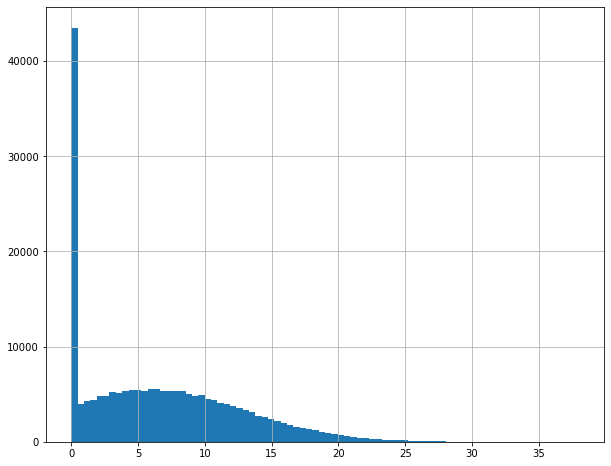

In [10]:
calls['duration'].hist(bins=80, figsize = (10,8))

plt.show()

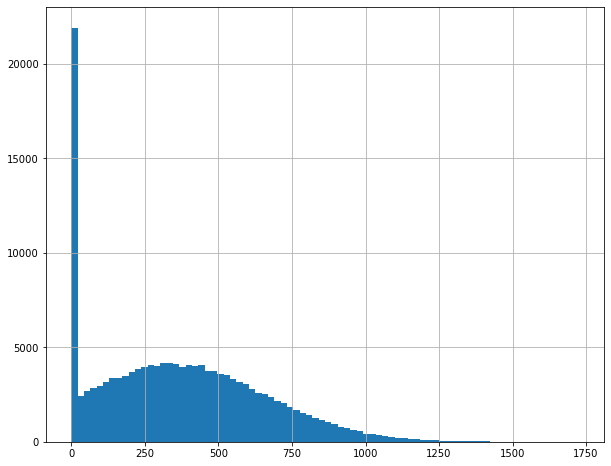

In [11]:
internet['mb_used'].hist(bins=80, figsize = (10,8))
plt.show()

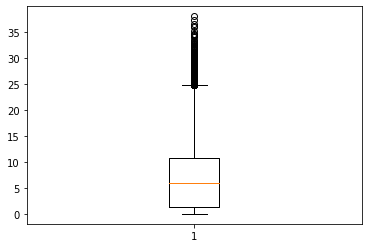

In [12]:
plt.boxplot(calls['duration'])
plt.show()

In [13]:
print ('до удаления________________________')
print ('_________________________________')
internet.info()
internet = internet.drop(internet[internet.mb_used == 0].index)
print ('после удаления______________________')
print ('_________________________________')
internet.info()

до удаления________________________
_________________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB
после удаления______________________
_________________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            129798 non-null  object        
 1   mb_used       129798 non-null  float64       
 2   session_date  129798 non-null  datetime64[n

Типы данных успешно изменены.

Для решения задачи расчёта объема потреблённых услуг по месяцам, введём дополнительные столбцы в фреймах с соответствующим **месяцем**

In [14]:
calls['month'] = calls['call_date'].dt.month
internet['month'] = internet['session_date'].dt.month
messages['month'] = messages['message_date'].dt.month


#округлим значение столбца времени звонка с тарифом смарт (в соответствии с условиями тарифа для корректного расчёта)
calls = pd.merge(calls, users, how = 'inner', on = 'user_id') #совместим таблицу calls и users для одновременного отображения
calls.info()                                                  #тарифов и времени разговора
print ('средняя величина длительности разговора до округления составляет', calls.query('tariff == "smart"')['duration'].mean())
def round_ceil_duration (row): #вводим функцию округления длительности тарифов смарт для метода apply
    duration_revenue = 0
    tariff = row['tariff']
    duration = row['duration']
    if tariff == 'smart':
        duration_revenue = math.ceil(duration) #для округления использовали модуль math и метод ceil
        return duration_revenue
    else: 
        return duration

calls['duration'] = calls.apply(round_ceil_duration, axis = 1) #используем метод apply, c функцией округления

    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202607 entries, 0 to 202606
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          202607 non-null  object        
 1   call_date   202607 non-null  datetime64[ns]
 2   duration    202607 non-null  float64       
 3   user_id     202607 non-null  int64         
 4   month       202607 non-null  int64         
 5   age         202607 non-null  int64         
 6   churn_date  202607 non-null  datetime64[ns]
 7   city        202607 non-null  object        
 8   first_name  202607 non-null  object        
 9   last_name   202607 non-null  object        
 10  reg_date    202607 non-null  datetime64[ns]
 11  tariff      202607 non-null  object        
dtypes: datetime64[ns](3), float64(1), int64(3), object(5)
memory usage: 20.1+ MB
средняя величина длительности разговора до округления составляет 6.746559030042621


In [15]:
print ('mean before',calls['duration'].mean())
calls['duration'] = np.ceil(calls['duration'])
print ('mean after', calls['duration'].mean())

mean before 7.014511838189173
mean after 7.158197890497367


In [16]:
print ('Среднее значение после округления', calls.query('tariff == "smart"')['duration'].mean())
print ('Общая длительность всех звонков в выборке', calls.query('tariff == "smart"')['duration'].sum())
#print(calls['duration'].sum())
#print (calls['duration'].mean())

Среднее значение после округления 7.1486551816751716
Общая длительность всех звонков в выборке 931577.0


***Промежуточный вывод*** Сумма всех ячеек столбца фрейма с длительностью звонков составляет целое число, что с большой вероятностью говорит об успешном округлении всех ячеек фрейма, средний показатель длительности звонков логично вырос. Ячейки готовы для расчёта показателей выручки.

Введём новый фрейм с агрегированными показателями **по каждому пользователю**, в т.ч. mean, count, sum. Для этого воспользуемся pivot таблицами. Методология дальнейшей работы с данными: по общим задачам - работаем со сводными таблицами и агрегированными показателями, в случае необходимости углубления в данные - вновь прибегаем к отдельным фреймам.

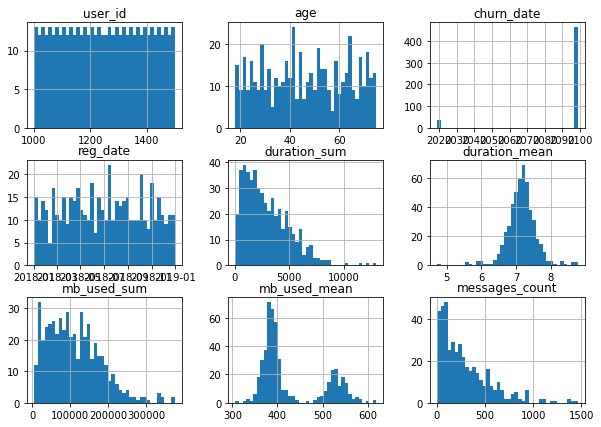

In [17]:
calls_pivot = calls.pivot_table(index='user_id', values='duration', aggfunc= ['sum','mean'])
calls_pivot = calls_pivot.reset_index()
calls_pivot.columns = ['user_id', 'duration_sum', 'duration_mean']

internet_pivot = internet.pivot_table(index = 'user_id', values = 'mb_used', aggfunc = ['sum','mean'])
internet_pivot = internet_pivot.reset_index()
internet_pivot.columns = ['user_id', 'mb_used_sum', 'mb_used_mean']

messages_pivot = messages.pivot_table(index = 'user_id', values = 'message_date', aggfunc = 'count')
messages_pivot = messages_pivot.reset_index()
messages_pivot.columns = ['user_id', 'messages_count']


df_pivot = pd.merge (users, calls_pivot,   how='left', on='user_id')
df_pivot = pd.merge (df_pivot, internet_pivot, how='left', on='user_id')
df_pivot = pd.merge (df_pivot, messages_pivot, how='left', on='user_id')



df_pivot.hist(bins = 40, figsize = (10,7)) #предварительно оценим распределение значений в столбцах
plt.show()

### Вывод

Типы данных приведены в соответствие по фреймам, пропущенные значения заполнены, данные сведены в новый фрейм с агрегированными методами для первичного исследовательского анализа.

Рассмотрение распределений сводной таблицы показало следующее:
- age - равномерно распределённая вероятность
- duration_mean - распределение нормальное, возможные подвыборки с длительностями разговора с большой долей вероятности будут распределены вокруг пика этого распределения;
- duration_sum - общая длительность звонков, гистограмма имеет вид Пуассоновского распределения;
- mb_used_mean - средний использованный траффик интернета. На граффике 2 распределения близких к нормальным - вероятно связано с различными лимитами тарифов;
- mb_used_sum - сумма трафика по пользователям, вероятное наложение 2х подвыборок (с разными тарифами) имеет вид распределения близкий к Пуассоновскому;
- messages_count - распределение по количеству отправленных сообщений, распределение Пуассоновское.

Фреймы готовы для добавления результатов в таблицу, исследовательского и статистического анализа.

## Расчёты и добавление результатов в таблицу

Добавим в сводную таблицу столбцы с агрегированными показателями с разбивкой по пользователям:
- количества звонков по месяцам и их длительность
- количества сообщений по месяцам 
- объём траффика и количество сессий интернета по месяцам 
- помесячная выручка

Создадим сводные таблицы сразу по 2м индексам - user_id и месяцами. Затем в качестве величин определим:
- для длительности звонков - сумму и количество звонков
- для сообщений - количество сообщений
- для интернета - количество сессий и сумму мегабайт

In [18]:
calls_month = calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = ['sum','count']).reset_index()
messages_month = messages.pivot_table(index = ['user_id', 'month'], values = 'message_date', aggfunc = 'count').reset_index()
internet_month = internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = ['count', 'sum']).reset_index()

Совместим три новых фрейма в единый по двум столбцам - месяц и id клиента для добавления новых данных (выручки) и помесячного анализа некоторых показателей.

In [19]:

df_month = pd.merge (calls_month, messages_month, how='outer', on=['month','user_id']) #используем merge соединяем по внешнему (с сохранением всех строк каждого фрейма)
df_month = pd.merge (df_month,internet_month, how='outer', on=['month','user_id'] ) 


df_month.columns = ['month','user_id','user_id_2','month_2','call_duration','count_calls','count_message','internet_sessions','mb_used'] #переименовываем столбцы
df_month = df_month.drop(['user_id_2'], axis = 1) #удаляем все дубликаты столбцов от сцепки
df_month = df_month.drop(['month_2'], axis = 1)

df_month.fillna(0) #пропущенные значения заполняем на нули


,month,user_id,call_duration,count_calls,count_message,internet_sessions,mb_used
0,5,1000,159.0,22.0,22.0,4.0,2253.49
1,6,1000,172.0,43.0,60.0,44.0,23233.77
2,7,1000,340.0,47.0,75.0,28.0,14003.64
3,8,1000,408.0,52.0,81.0,27.0,14055.93
4,9,1000,466.0,58.0,57.0,25.0,14568.91
...,...,...,...,...,...,...,...
3209,9,1489,0.0,0.0,32.0,49.0,17206.30
3210,10,1489,0.0,0.0,21.0,52.0,19559.44
3211,11,1489,0.0,0.0,20.0,45.0,17491.56
3212,12,1489,0.0,0.0,35.0,43.0,17322.51


In [20]:
#сцепляем фрейм с данными пользователей
df_month = pd.merge(df_month, users, how = 'outer', on = 'user_id')
df_month #проверяем результат сцепки

,month,user_id,call_duration,count_calls,count_message,internet_sessions,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,5.0,1000,159.0,22.0,22.0,4.0,2253.49,52,2099-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,6.0,1000,172.0,43.0,60.0,44.0,23233.77,52,2099-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,7.0,1000,340.0,47.0,75.0,28.0,14003.64,52,2099-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,8.0,1000,408.0,52.0,81.0,27.0,14055.93,52,2099-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,9.0,1000,466.0,58.0,57.0,25.0,14568.91,52,2099-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,10.0,1489,NaN,NaN,21.0,52.0,19559.44,35,2099-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,11.0,1489,NaN,NaN,20.0,45.0,17491.56,35,2099-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3213,12.0,1489,NaN,NaN,35.0,43.0,17322.51,35,2099-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3214,NaN,1128,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra


Сцепка показала наличие 2х пользователей без сводных средних значений по месяцам, это пользователи с user_id  = 1128,1371 (разница между датой регистрации и датой отписки около 7 дней). Предположительно подписка была пробной или случайной.

Добавим столбец с показателем выручки по месяцам в разрезе каждого пользователя. 

Заполнение строк осуществим через метод apply

In [21]:
tariffs.columns = ['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff']  #меняем имя столбца с тарифами для сцепки двух фреймов по столбцу 'tariff'

In [22]:

df_month = pd.merge(df_month, tariffs, how = 'left', on = 'tariff') #добавляем во фрейм данные соответствующего тарифа 
df_month = df_month.fillna(0)
df_month.info() #проверяем корректность сцепки 
df_month.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   month                  3216 non-null   float64       
 1   user_id                3216 non-null   int64         
 2   call_duration          3216 non-null   float64       
 3   count_calls            3216 non-null   float64       
 4   count_message          3216 non-null   float64       
 5   internet_sessions      3216 non-null   float64       
 6   mb_used                3216 non-null   float64       
 7   age                    3216 non-null   int64         
 8   churn_date             3216 non-null   datetime64[ns]
 9   city                   3216 non-null   object        
 10  first_name             3216 non-null   object        
 11  last_name              3216 non-null   object        
 12  reg_date               3216 non-null   datetime64[ns]
 13  tar

Index(['month', 'user_id', 'call_duration', 'count_calls', 'count_message',
       'internet_sessions', 'mb_used', 'age', 'churn_date', 'city',
       'first_name', 'last_name', 'reg_date', 'tariff', 'messages_included',
       'mb_per_month_included', 'minutes_included', 'rub_monthly_fee',
       'rub_per_gb', 'rub_per_message', 'rub_per_minute'],
      dtype='object')

In [23]:
df_month['mb_used'] = df_month['mb_used']/1024                                             #преобразую в ГБты 
df_month['mb_per_month_included'] = df_month['mb_per_month_included']/1024

df_month['mb_used'] = np.ceil(df_month['mb_used'])
df_month['mb_per_month_included'] = np.ceil(df_month['mb_per_month_included'])

df_month.columns = ['month', 'user_id', 'call_duration', 'count_calls', 'count_message',   #меняю название столбцов Мб в Гб
       'internet_sessions', 'gb_used', 'age', 'churn_date', 'city',
       'first_name', 'last_name', 'reg_date', 'tariff', 'messages_included',
       'gb_per_month_included', 'minutes_included', 'rub_monthly_fee',
       'rub_per_gb', 'rub_per_message', 'rub_per_minute']

In [24]:
df_month['gb_used'].max()

49.0

Создаём логические/арифметические функции для подсчёта выручки по тарифу с помощью метода apply

In [25]:
# создаём функции для поиска сверхлимита по различным ресурсам. Если ниже лимита - возвращаем 0, иначе - возвращаем разницу.

def over_limit_minutes(row):
    result = row['call_duration'] - row['minutes_included']
    if result <= 0:
        return 0
    else:
        return result
df_month['min_over_limit'] = df_month.apply(over_limit_minutes, axis = 1)


#тоже самое для интернет траффика
def over_limit_gb(row):
    result = row['gb_used'] - row['gb_per_month_included']
    if result <= 0:
        return 0
    else:
        return result
df_month['gb_over_limit'] = df_month.apply(over_limit_gb, axis = 1)


#тоже для сообщений
def over_limit_messages(row):
    result = row['count_message'] - row['messages_included']
    if result <= 0:
        return 0
    else:
        return result
df_month['messages_over_limit'] = df_month.apply(over_limit_messages, axis = 1)





In [26]:
def revenue_tariff(row):
    
    
    revenue = 0   #переменная выручки, которую вернём в строку фрейма после всех логических операций
    
    tariff = row['tariff'] #локальная переменная с наименованием тарифа
    
    min_over_limit = row ['min_over_limit']
    gb_over_limit = row['gb_over_limit']       #переменные с объёмами сверхлимитного потребления (в гигах)
    messages_over_limit = row['messages_over_limit']
    
    rub_monthly_fee = row['rub_monthly_fee'] 
    rub_per_gb = row['rub_per_gb']
    rub_per_message = row['rub_per_message']  #переменные с ценами абонентки и ценами за сверхлимиты
    rub_per_minute = row['rub_per_minute']
    
    #выручка = абонентская плата + объёмы сверхлимитного * на цену услуги сверхлимитного потребления (значения тарифа смарт округлили заранее)
    revenue = rub_monthly_fee + min_over_limit*rub_per_minute + gb_over_limit*rub_per_gb + messages_over_limit*rub_per_message
    return revenue
    
    
df_month['total_revenue'] = df_month.apply(revenue_tariff, axis = 1) #применям функцию для нового столбца
df_month['total_revenue'].describe() #оценим столбец выручки в целом по выборке


    

count    3216.000000
mean     1528.902674
std       798.224060
min       550.000000
25%       750.000000
50%      1653.500000
75%      1950.000000
max      6770.000000
Name: total_revenue, dtype: float64

### Вывод

Добавление данных и предобработка для дальнейшего исследовательского и статистического анализа прошла успешно:
- созданы фреймы для анализа (среднегодовые величины, ежемесячные величины);
- расчитаны показатели выручки для анализа и подготовки рекоммендаций.
- обнаружены всего 2 пустых строки клиента, что в целом не повлияет на результаты исследовательского анализа.

## Исследовательский и статистический анализ данных

- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
- Посчитать среднее количество, дисперсию и стандартное отклонение. 
- Постройте гистограммы. 

In [27]:
#рассмотрение статистики по длительности звонков
smart = df_month.query('tariff == "smart"') #создаём новый фрейм только с клиентами тарифа Смарт
ultra = df_month.query('tariff == "ultra"') #создаём новый фрейм с клиентами тарифа Ultra
print('Описание столбца call_duration тарифа Смарт')
display (smart['call_duration'].describe())
print('Описание столбца call_duration тарифа Ультра')
display (ultra['call_duration'].describe())
print('____________________________________________________________________________________________')
print ('Среднемесячная величина длительности звонков тарифа Смарт:', smart['call_duration'].mean())
print ('Среднемесячная величина длительности звонков тарифа Ультра:',ultra['call_duration'].mean())
print('____________________________________________________________________________________________')
print ('Среднемесячная дисперсия длительности звонков тарифа Смарт:', np.var(smart['call_duration'], ddof=1)) #дисперсия для выборки с параметром ddof = 1, в знаменателе формулы 'n-1'
print ('Среднемесячная дисперсия длительности звонков тарифа Ультра:', np.var(ultra['call_duration'], ddof=1))
print('____________________________________________________________________________________________')
print ('Среднее стандартное отклонение длит. звонков тарифа Смарт:', smart['call_duration'].std())
print ('Среднее стандартное отклонение длит. звонков тарифа Ультра:',ultra['call_duration'].std())
print('____________________________________________________________________________________________')

Описание столбца call_duration тарифа Смарт


count    2230.000000
mean      417.747534
std       190.476754
min         0.000000
25%       282.000000
50%       421.500000
75%       545.000000
max      1435.000000
Name: call_duration, dtype: float64

Описание столбца call_duration тарифа Ультра


count     986.000000
mean      526.089249
std       317.887549
min         0.000000
25%       282.500000
50%       518.000000
75%       751.750000
max      1673.000000
Name: call_duration, dtype: float64

____________________________________________________________________________________________
Среднемесячная величина длительности звонков тарифа Смарт: 417.747533632287
Среднемесячная величина длительности звонков тарифа Ультра: 526.0892494929006
____________________________________________________________________________________________
Среднемесячная дисперсия длительности звонков тарифа Смарт: 36281.393836444564
Среднемесячная дисперсия длительности звонков тарифа Ультра: 101052.49354928375
____________________________________________________________________________________________
Среднее стандартное отклонение длит. звонков тарифа Смарт: 190.47675405792845
Среднее стандартное отклонение длит. звонков тарифа Ультра: 317.88754859113897
____________________________________________________________________________________________


In [28]:
#рассмотрение статистики по интернет трафику
print('Описание столбца gb_used тарифа Смарт')
display (smart['gb_used'].describe())
print('Описание столбца gb_used  тарифа Ультра')
display (ultra['gb_used'].describe())
print('____________________________________________________________________________________________')
print ('Среднемесячная величина интернет-трафика тарифа Смарт:', smart['gb_used'].mean())
print ('Среднемесячная величина интернет-трафика тарифа Ультра:',ultra['gb_used'].mean())
print('____________________________________________________________________________________________')
print ('Среднемесячная дисперсия интернет-трафика тарифа Смарт:',  np.var(smart['gb_used'], ddof=1)) #дисперсия для выборки с параметром ddof = 1, в знаменателе формулы 'n-1'
print ('Среднемесячная дисперсия интернет-трафика тарифа Ультра:', np.var(ultra['gb_used'], ddof=1))
print('____________________________________________________________________________________________')
print ('Среднее стандартное отклонение трафика тарифа Смарт:', smart['gb_used'].std())
print ('Среднее стандартное отклонение трафика тарифа Ультра:',ultra['gb_used'].std())
print('____________________________________________________________________________________________')

Описание столбца gb_used тарифа Смарт


count    2230.000000
mean       16.321525
std         5.756167
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: gb_used, dtype: float64

Описание столбца gb_used  тарифа Ультра


count    986.000000
mean      19.474645
std        9.868057
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: gb_used, dtype: float64

____________________________________________________________________________________________
Среднемесячная величина интернет-трафика тарифа Смарт: 16.32152466367713
Среднемесячная величина интернет-трафика тарифа Ультра: 19.474645030425965
____________________________________________________________________________________________
Среднемесячная дисперсия интернет-трафика тарифа Смарт: 33.13345303550617
Среднемесячная дисперсия интернет-трафика тарифа Ультра: 97.3785442901125
____________________________________________________________________________________________
Среднее стандартное отклонение трафика тарифа Смарт: 5.756166522565706
Среднее стандартное отклонение трафика тарифа Ультра: 9.868056763624361
____________________________________________________________________________________________


In [29]:
#рассмотрение статистики по сообщениям
print('Описание столбца count_message тарифа Смарт')
display (smart['count_message'].describe())
print('Описание столбца count_message  тарифа Ультра')
display (ultra['count_message'].describe())
print('____________________________________________________________________________________________')
print ('Среднемесячная величина количества сообщений тарифа Смарт:', smart['count_message'].mean())
print ('Среднемесячная величина количества сообщений тарифа Ультра:',ultra['count_message'].mean())
print('____________________________________________________________________________________________')
print ('Среднемесячная дисперсия количества сообщений тарифа Смарт:', np.var(smart['count_message'], ddof=1)) #дисперсия для выборки с параметром ddof = 1, в знаменателе формулы 'n-1'
print ('Среднемесячная дисперсия количества сообщений тарифа Ультра:', np.var(ultra['count_message'], ddof=1))
print('____________________________________________________________________________________________')
print ('Среднее стандартное отклонение количества сообщений тарифа Смарт:', smart['count_message'].std())
print ('Среднее стандартное отклонение количества сообщений тарифа Ультра:',ultra['count_message'].std())
print('____________________________________________________________________________________________')

Описание столбца count_message тарифа Смарт


count    2230.000000
mean       33.369058
std        28.230396
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: count_message, dtype: float64

Описание столбца count_message  тарифа Ультра


count    986.000000
mean      49.313387
std       47.806040
min        0.000000
25%        6.000000
50%       38.000000
75%       78.750000
max      224.000000
Name: count_message, dtype: float64

____________________________________________________________________________________________
Среднемесячная величина количества сообщений тарифа Смарт: 33.36905829596412
Среднемесячная величина количества сообщений тарифа Ультра: 49.31338742393509
____________________________________________________________________________________________
Среднемесячная дисперсия количества сообщений тарифа Смарт: 796.9552557301104
Среднемесячная дисперсия количества сообщений тарифа Ультра: 2285.417424655839
____________________________________________________________________________________________
Среднее стандартное отклонение количества сообщений тарифа Смарт: 28.230395954185806
Среднее стандартное отклонение количества сообщений тарифа Ультра: 47.80603962530089
____________________________________________________________________________________________


In [30]:

smart_sum = df_month.query('tariff == "smart"')['total_revenue'].sum()
ultra_sum = df_month.query('tariff == "ultra"')['total_revenue'].sum()
print ('Текущее соотношение выручки двух тарифов')
print ('Выручка по выборке от тарифа Смарт: {:.2f}'.format(smart_sum),'рублей в год')
print ('Выручка по выборке от тарифа Ультра: {:.2f}'.format(ultra_sum),'рублей в год')
print ('Выручка по тарифу Cмарт превышает ультра в {:.2f}'.format(smart_sum/ultra_sum),'раз')

Текущее соотношение выручки двух тарифов
Выручка по выборке от тарифа Смарт: 2875901.00 рублей в год
Выручка по выборке от тарифа Ультра: 2041050.00 рублей в год
Выручка по тарифу Cмарт превышает ультра в 1.41 раз


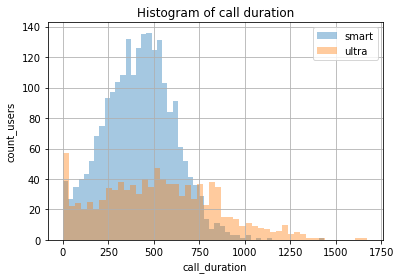

In [31]:
smart['call_duration'].hist(bins = 50, alpha = 0.4)
ultra['call_duration'].hist(bins = 50, alpha = 0.4)
plt.title("Histogram of call duration")
plt.xlabel('call_duration')
plt.ylabel("count_users")
plt.legend(['smart', 'ultra'])

plt.show()

***Промежуточный вывод:*** График тарифа смарт с общей длительностью звонков имеет нормальное распределение, тариф ультра скошен влево и имеет большую долю с нулевым значением (что очевидно будет влиять на среднее), вместе с тем, средние значения находятся рядом.

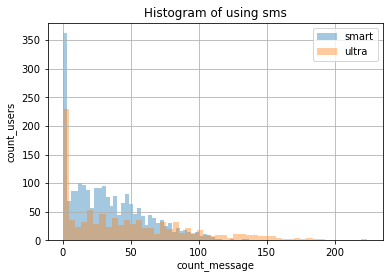

In [32]:
smart['count_message'].hist(bins = 50, alpha = 0.4)
ultra['count_message'].hist(bins = 50, alpha = 0.4)
plt.title("Histogram of using sms")
plt.xlabel("count_message")
plt.ylabel("count_users")
plt.legend(['smart', 'ultra'])
plt.show()

Нулевые значения объясняются большим числом пользователей, не пользующихся сообщениями. Длинный хвост данных говорит о значительном числе пользователей редко пользующихся данной услугой. Среднее по тарифу ультра превышает то же значение тарифа смарт.

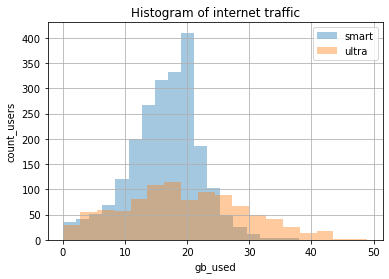

In [33]:

smart['gb_used'].hist(bins = 18, alpha = 0.4)
ultra['gb_used'].hist(bins =  18, alpha = 0.4)
plt.title("Histogram of internet traffic")
plt.xlabel("gb_used")
plt.ylabel("count_users")
plt.legend(['smart', 'ultra'])
plt.show()

Исследовательский анализ данных столбца по интернет траффику показал: 
- бОльшую плотность значений расхода траффика тарифа смарт
- больший разброс (дисперсию) тарифа ультра

Рассмотрим помесячную динамику средней выручки по тарифам

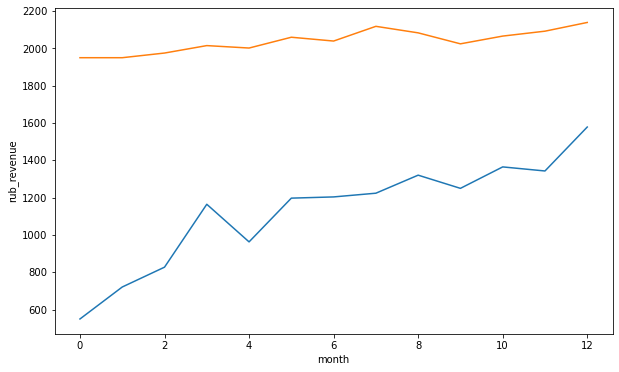

In [34]:

month_mean_smart = smart.groupby('month')['total_revenue'].mean()
month_count_smart = smart.groupby('month')['total_revenue'].count()
month_mean_ultra = ultra.groupby('month')['total_revenue'].mean()
month_count_ultra = ultra.groupby('month')['total_revenue'].count()

month_mean_df_smart =  pd.DataFrame(month_mean_smart)
month_mean_df_ultra =  pd.DataFrame(month_mean_ultra)
plt.figure(figsize=(10, 6))

plt.xlabel('month')
plt.ylabel('rub_revenue')
plt.plot(month_mean_df_smart.index, month_mean_df_smart['total_revenue'])
plt.plot(month_mean_df_ultra.index, month_mean_df_ultra['total_revenue'])

plt.show()


Динамика по месяцам показывает более выраженный относительный рост выручки тарифа Smart. Тендеция  (конвергенция) позволяет строить предположение, что при прочих равных условиях и сохранении динамики средние показатели выручки могут стать сопоставимыми.

### Вывод

Исследовательский (сравнительный) анализ гистограмм распределений показал нормальное распределение массива со средней выручкой, что открывает возможность проведения тестов на статистическую значимость гипотиз (t-тест Стьюдента). Средние значения длительности звонков и расхода трафика показывают неочевидные результаты, что требует проведения статистического анализа.

## Выдвижение и проверка гипотез

Пара гипотез - равенства выручек тарифов/превышение выручки тарифа Ультра:
H0 = средние значения выручки тарифов smart и ultra ***равны***
H1 = средняя выручка пользователя с тарифом Ultra - выше

примем уровень статистической значимости альфа = 0,05

In [35]:
print(np.var(smart['total_revenue']))
print(np.var(ultra['total_revenue']))

levene_test = levene(smart['total_revenue'], ultra['total_revenue'])
print(levene_test)

669430.4361979977
141244.31956107417
LeveneResult(statistic=603.9341078123845, pvalue=2.3578651290079928e-122)


P-value теста левене - исчезающе малая величина. Примем значение аргумента equal_var теста стьюдента, равное False

In [36]:
alpha = 0.05
print ()

compare_smart_ultra = st.ttest_ind(smart['total_revenue'], ultra['total_revenue'], equal_var = False)

print('p-значение: ', compare_smart_ultra.pvalue)

if (compare_smart_ultra.pvalue < alpha) and (ultra['total_revenue'].mean() > smart['total_revenue'].mean()):
    print("Отвергаем нулевую гипотезу, средняя выручка тарифа Ультра по выборке - выше в", ultra['total_revenue'].mean()/smart['total_revenue'].mean(), 'раз')
else:
    print("Не получилось отвергнуть нулевую гипотезу, средние выручки могут быть сопоставимы") 


p-значение:  1.927011394420941e-250
Отвергаем нулевую гипотезу, средняя выручка тарифа Ультра по выборке - выше в 1.6051205691359267 раз


Пара гипотез - равенства выручек по Московским и иным/превышение выручки по Москвичам:
H0 = средние значения выручки москвичей и немосквичей равны
H1 = средняя выручка по москвичам выше чем по немосквичам

примем уровень статистической значимости альфа = 0,05 (оставим переменную без изменения)
сделаем запрос из общего датасета по москвичам.

In [37]:


moscow = df_month.query('city == "Москва"')
ne_moscow = df_month.query('city != "Москва"')                     

print(np.var(moscow['total_revenue']))
print(np.var(ne_moscow['total_revenue']))

levene_test = levene(moscow['total_revenue'], ne_moscow['total_revenue'])
print(levene_test)



564710.7117467269
653818.4925923563
LeveneResult(statistic=6.04283195023284, pvalue=0.014015266770621706)


Дисперсии массивов разные, p - value теста Левене ниже 0,05. Примем значение equal_var равное False.

In [38]:
print (moscow['total_revenue'].mean(),ne_moscow['total_revenue'].mean())

print ('Фрейм разделён корректно = ', len(df_month) == len(moscow) +  len(ne_moscow))

ttest_moscow_nemoscow = st.ttest_ind(moscow['total_revenue'], ne_moscow['total_revenue'], equal_var = False)

print('p-значение: ', ttest_moscow_nemoscow.pvalue) #возвращаем p-value теста


if (ttest_moscow_nemoscow.pvalue < alpha) and (moscow['total_revenue'].mean() > ne_moscow['total_revenue'].mean()):
    print("Отвергаем нулевую гипотезу, средняя выручка тарифа Ультра по выборке - выше в", moscow['total_revenue'].mean()/ne_moscow['total_revenue'].mean(), 'раз')
else:
    print("Не получилось отвергнуть нулевую гипотезу, средние выручки могут быть сопоставимы") 

1546.7135842880523 1524.7251439539348
Фрейм разделён корректно =  True
p-значение:  0.5216952110000279
Не получилось отвергнуть нулевую гипотезу, средние выручки могут быть сопоставимы


### Вывод

Проверка нулевой гипотезы о равенстве средних показателей выручки генеральной совокупности - не нашла подтверждения. Средние выручки по тарифам с большой вероятностью (p-value стремится к нулю, уровень значимости 0,05) -  не совпадают.

Данные теста Стьюдента о равенстве средних показателей выручки генеральных совокупностей москвичей и немосквичей не противоречат нулевой гипотезе. С большой долей вероятности (p-value = 0,39, alpha = 0,05)

## Общий вывод

Данные исследованы, задачи решены, цели достигнуты. 
Интерпретация результатов для подготовки рекоммендаций по корректировке рекламного бюджета Мегалайн:

- опровержение нулевой гипотезы о равенстве средних выручек  тарифов smart и ultra говорит о необходимости выбора тарифа ultra (альтернативная гипотеза) для рекламы при прочих равных условиях и издержках Мегалайн, связанных с предоставлением услуг по тарифам. При этом динамика роста выручки по тарифам показала конвергенцию при росте выручки сразу двух тарифов, где тариф Smart растёт быстрее. 

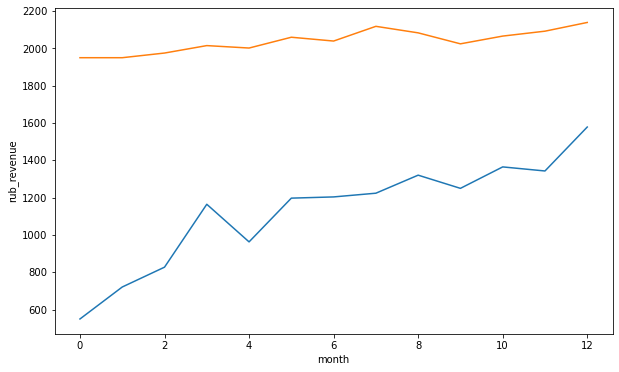

In [39]:
plt.figure(figsize=(10, 6))

plt.xlabel('month')
plt.ylabel('rub_revenue')
plt.plot(month_mean_df_smart.index, month_mean_df_smart['total_revenue'])
plt.plot(month_mean_df_ultra.index, month_mean_df_ultra['total_revenue'])

plt.show()

Такая динамика указывает на постепенное приближение показателей средней выручки Смарта к тарифу Ультра, что спустя время потребует дополнительного анализа и корректировки рекламного бюджета в сторону тарифа Smart.
- гипотеза о равенстве средних выручек генеральных совокупностей тарифов Смарт и Ультра, напротив, нашла подтверждение. С большой долей вероятности средние показатели выручки по москвичам и немосквичам - равны, следовательно, если привлечение клиентов не в столице обходится дешевле (roi в Мск дороже), Мегалайн должен больше вкладывать средства в региональную рекламу. В противном случае - разницы в отдаче в рекламе на Москву и на "неМоскву" - нет.